In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
ardd_path = "Resources/ardd_fatalities_2023.csv"

# assign csv info into ardd
ardd = pd.read_csv(ardd_path,header=0,low_memory=False,dtype={"Speed Limit":"string",
                                                               "National Remoteness Areas": "string",
                                                               "SA4 Name 2021": "string",
                                                               "National LGA Name 2021": "string",
                                                               "National Road Type": "string",
                                                                "Year": "string"})

# preview data
ardd

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20237008,NT,10,2023,Friday,NaN,Single,No,No,No,...,24,<NA>,<NA>,<NA>,<NA>,No,No,17_to_25,Weekend,Night
1,20234009,SA,10,2023,Saturday,3:00,Single,No,No,No,...,22,Outer Regional Australia,Barossa - Yorke - Mid North,Yorke Peninsula,Local Road,No,No,17_to_25,Weekend,Night
2,20233087,Qld,10,2023,Saturday,3:00,Single,No,No,No,...,19,Inner Regional Australia,Wide Bay,Gympie,Collector Road,No,No,17_to_25,Weekend,Night
3,20233149,Qld,10,2023,Sunday,3:00,Single,No,No,No,...,37,Inner Regional Australia,Wide Bay,Bundaberg,Local Road,No,No,26_to_39,Weekend,Night
4,20233190,Qld,10,2023,Sunday,3:00,Multiple,No,No,No,...,35,Outer Regional Australia,Mackay - Isaac - Whitsunday,Mackay,Sub-arterial Road,No,No,26_to_39,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55355,19893326,Qld,1,1989,Monday,9:00,Multiple,No,-9,No,...,2,<NA>,<NA>,<NA>,<NA>,No,No,0_to_16,Weekday,Day
55356,19892576,Vic,1,1989,Friday,17:15,Multiple,No,No,No,...,6,<NA>,<NA>,<NA>,<NA>,No,No,0_to_16,Weekday,Day
55357,19894151,SA,1,1989,Wednesday,11:45,Multiple,No,-9,No,...,73,<NA>,<NA>,<NA>,<NA>,No,No,65_to_74,Weekday,Day
55358,19892548,Vic,1,1989,Sunday,1:00,Multiple,No,No,No,...,23,<NA>,<NA>,<NA>,<NA>,No,No,17_to_25,Weekend,Night


In [2]:
# remove unwanted columns "National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"
clean_ardd = ardd.drop(columns=["National Remoteness Areas","SA4 Name 2021","National LGA Name 2021","National Road Type", "Christmas Period", "Bus Involvement", "Heavy Rigid Truck Involvement", "Articulated Truck Involvement", "Easter Period"])

# gather latest and earliest year for the title in graphs
min_year = clean_ardd["Year"].min()
max_year = clean_ardd["Year"].max()

# replace the "_" with " " in column "Age Group"
clean_ardd["Age Group"] = clean_ardd["Age Group"].str.replace("_"," ")

# remove the ":" in column "Time"
clean_ardd["Time"] = clean_ardd["Time"].str.replace(":","")

# replace "-9" with Unknown as described in the data dictionary
clean_ardd=clean_ardd.replace({"-9":"Unknown"}).replace({-9: "Unknown"})

# change data type from String to Int
clean_ardd['Year'] = clean_ardd['Year'].astype(int)

# remove rows with Unknown time
clean_ardd = clean_ardd[clean_ardd.Time != "Unknown"]
clean_ardd.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Day of week,Time of day
0,20237008,NT,10,2023,Friday,NaN,Single,Unknown,Driver,Female,24,17 to 25,Weekend,Night
1,20234009,SA,10,2023,Saturday,300,Single,100,Driver,Male,22,17 to 25,Weekend,Night
2,20233087,Qld,10,2023,Saturday,300,Single,80,Driver,Male,19,17 to 25,Weekend,Night
3,20233149,Qld,10,2023,Sunday,300,Single,60,Passenger,Male,37,26 to 39,Weekend,Night
4,20233190,Qld,10,2023,Sunday,300,Multiple,100,Motorcycle rider,Male,35,26 to 39,Weekend,Night


### Crash on a road by State

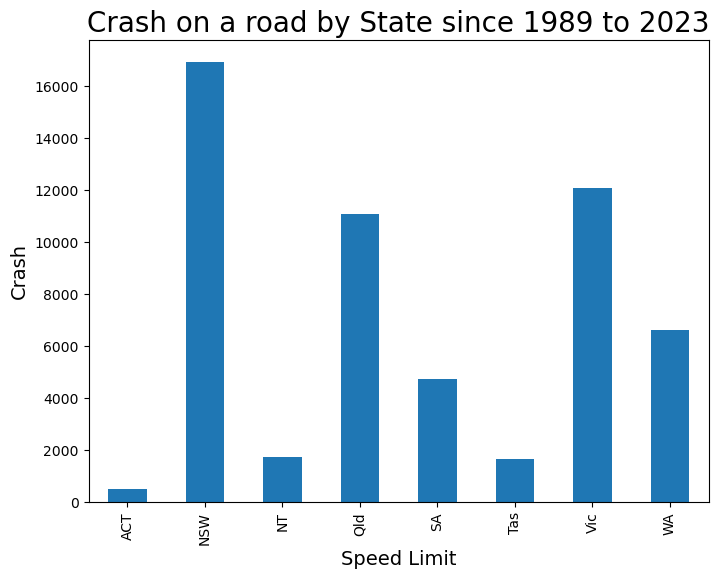

In [19]:
# capture state and Crash ID into new dataframe
state_year_df = clean_ardd[["State","Year"]]

# group by the state and count the number of fatality
groupby_state = state_year_df.groupby(["State"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold State and Count
groupby_state_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_state_df.plot(kind="bar", figsize=(8,6), legend=False)

# Set a Title and labels
plt.title(f"Crash on a road by State since {min_year} to 2023", fontsize=20)
plt.ylabel("Crash",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.savefig("output_data/Fig2.png",dpi=300, bbox_inches = "tight")
plt.show()

In [3]:
# NSW dataframe
NSW_df = clean_ardd.loc[clean_ardd["State"] == "NSW", :]
NSW_df.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Day of week,Time of day
13,20231095,NSW,10,2023,Wednesday,1840,Single,70,Driver,Male,40,40 to 64,Weekday,Night
15,20231059,NSW,10,2023,Friday,2308,Single,80,Driver,Male,44,40 to 64,Weekend,Night
20,20231105,NSW,10,2023,Friday,1800,Multiple,70,Motorcycle rider,Male,55,40 to 64,Weekend,Night
33,20231013,NSW,10,2023,Monday,1630,Multiple,100,Passenger,Male,18,17 to 25,Weekday,Day
36,20231113,NSW,10,2023,Saturday,005,Single,100,Driver,Male,75,75 or older,Weekend,Night


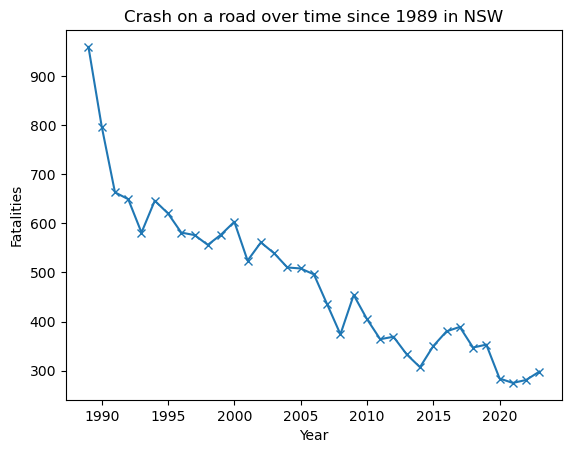

In [4]:
# capture Year and state NSW into new dataframe
state_year_df = NSW_df[["State","Year"]]

# group by the Year and count the number of fatality
groupby_state = state_year_df.groupby(["Year"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold Year and Count
groupby_year_df = pd.DataFrame({"Count": count
                           })

plt.plot(groupby_year_df, marker = "x")
plt.title(f"Crash on a road over time since {min_year} in NSW")
plt.ylabel("Fatalities")
plt.xlabel("Year")
plt.savefig("output_data/Fig3.png",dpi=300, bbox_inches = "tight")
plt.show()

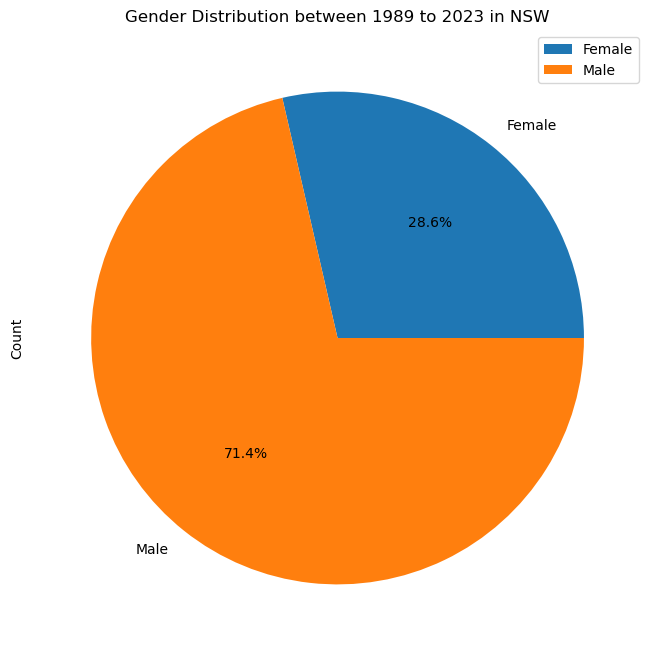

In [5]:
# capture the requried Gender and Crash ID into gender_df
gender_df = NSW_df[["Crash ID","Gender"]]
groupby_gender = gender_df.groupby(["Gender"])

# calculate count
count = groupby_gender["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0,0.1,0.1,0.1]
plot = groupby_gender_df.plot.pie(y="Count", explode = None, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Gender Distribution between {min_year} to {max_year} in NSW")
plt.savefig("output_data/Fig4.png",dpi=300, bbox_inches = "tight")
plt.show()

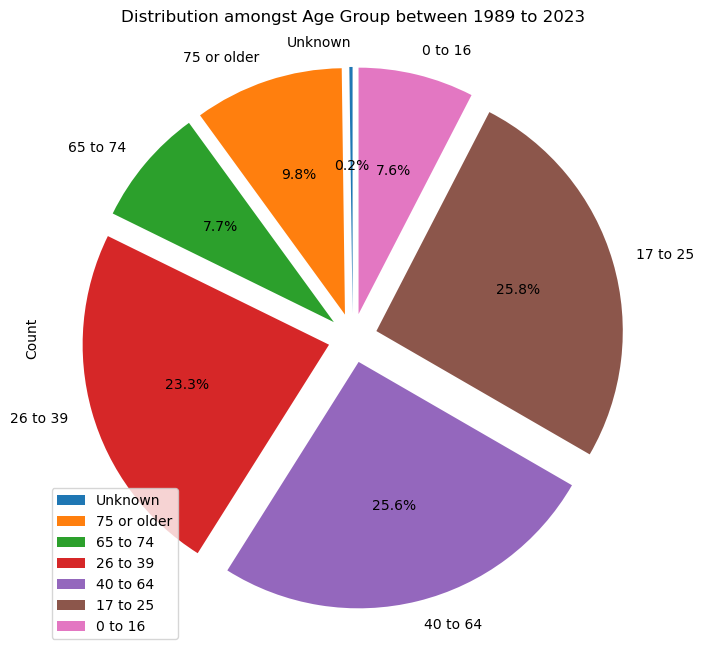

In [6]:
# Generate a pie plot showing the distribution of age group versus crashes using pandas
ageg_df = clean_ardd[["Crash ID","Age Group"]]
groupby_ageg = ageg_df.groupby(["Age Group"])

# calculate count
count = groupby_ageg["Crash ID"].count()

# create a dataframe to hold Age Group and Count
groupby_ageg_df = pd.DataFrame({"Count": count
                           })

groupby_ageg_df = groupby_ageg_df.reindex(['Unknown','75 or older', '65 to 74', '26 to 39', '40 to 64', '17 to 25' ,'0 to 16'])

# set the explode value
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plot = groupby_ageg_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=90, autopct="%1.1f%%")
plt.title(f"Distribution amongst Age Group between {min_year} to {max_year}")
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

plt.show()

## Speed limit vs. No. of Deaths

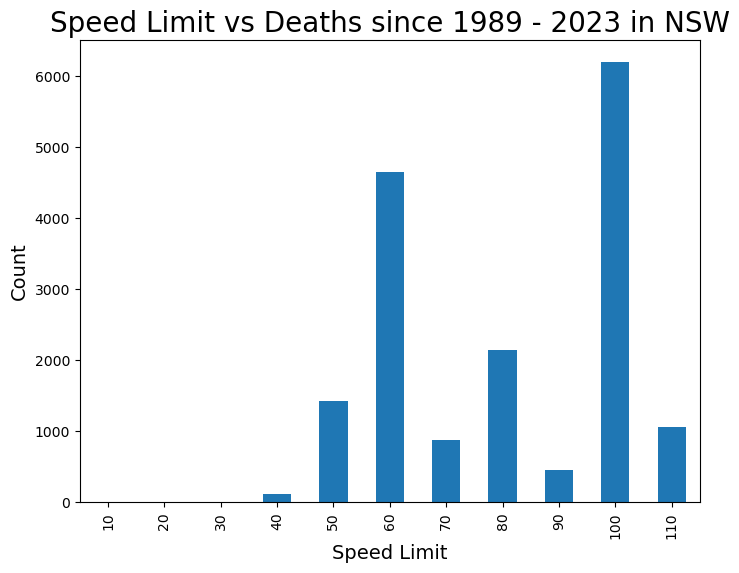

In [7]:
# capture Speed Limit and Crash ID into new dataframe
spdlmt_df = NSW_df[["Speed Limit","Crash ID"]]

# remove "unknown", "unspecified" and "<40"
spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] != "Unknown") 
                      & (spdlmt_df["Speed Limit"] != "Unspecified") 
                     & (spdlmt_df["Speed Limit"] != "<40") ]

# uniform the data type to INT as some of it is in STR
spdlmt_df["Speed Limit"] = spdlmt_df["Speed Limit"].astype(int)


# group by the Speed Limit and count the number of fatality
groupby_spdlmt = spdlmt_df.groupby(["Speed Limit"])

# calculate count
count = groupby_spdlmt["Crash ID"].count()

# create a dataframe to hold speed limit and Count
groupby_spdlmt_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_spdlmt_df.plot(kind="bar", figsize=(8,6), legend=False)

# Set a Title and labels
plt.title(f"Speed Limit vs Deaths since {min_year} - 2023 in NSW", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
# in the number of crashes in NSW and speed cameras

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import chi2_contingency
import requests
import time
from pathlib import Path
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import hvplot.pandas


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# File to Load 
crash_data_path = ("Resources/CSV_CRASH_DATA.csv")

# Assign csv info into crash_data 
crash_data = pd.read_csv(crash_data_path)

crash_data

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),Non-casualty (towaway),2018,2018,February,Thursday,06:00 - 07:59,SACKVILLE,ST,...,Manov - Reverse in traffic,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),3,0,0,0,0
1,1158000,Fatal,Fatal,2018,2018,January,Monday,00:01 - 01:59,BRUNKER,RD,...,On path - Parked,NaN,Other angle,Car (sedan/hatch),Light truck utility(from 2018),2,1,2,0,0
2,1158001,Fatal,Fatal,2018,2018,January,Monday,08:00 - 09:59,CLARENCE,WAY,...,Off left bend into obj,Right,Vehicle - Object,Car (sedan/hatch),NaN,1,1,0,0,0
3,1158002,Fatal,Fatal,2018,2018,January,Monday,02:00 - 03:59,RAILWAY,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0
4,1158515,Fatal,Fatal,2018,2018,January,Tuesday,20:00 - 21:59,CHRISTINA,RD,...,Ped - Far side,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95868,1325645,Non-casualty (towaway),Non-casualty (towaway),2022,2022,September,Sunday,16:00 - 17:59,NEW ENGLAND,HWY,...,Left off cway into object,NaN,Vehicle - Object,4 wheel drive,NaN,1,0,0,0,0
95869,1327398,Injury,Minor/Other Injury,2022,2022,October,Monday,14:00 - 15:59,GIINAGAY,WAY,...,Adj - Right-thru from right,NaN,Right angle,4 wheel drive,Large rigid,2,0,0,0,1
95870,1328035,Non-casualty (towaway),Non-casualty (towaway),2022,2022,December,Saturday,16:00 - 17:59,KYOGLE,RD,...,Off right bend into obj,Left,Vehicle - Object,Light truck utility(from 2018),NaN,1,0,0,0,0
95871,1328036,Injury,Minor/Other Injury,2022,2022,October,Tuesday,10:00 - 11:59,AVOCA,DR,...,Ovtak - Head on,NaN,Head-on,Light truck utility(from 2018),4 wheel drive,2,0,0,0,3


In [4]:
#Dropping unwanted columns 
clean_crash_data = crash_data.drop(columns=[
    "Street of crash",
    "Street type",
    "DCA supplement",
    "Key TU type",
    "Other TU type",
    "Reporting year",
    "Street of crash",
    "Street type",
    "Distance",
    "Direction",
    "Identifying feature",
    "Identifying feature type",
    "Key TU type",
    "Route no.",
    "School zone location",
    "School zone active",
    "Type of location",
    "LGA",
    "Urbanisation",
    "Conurbation 1",
    "Alignment",
    "Primary permanent feature",
    "Primary temporary feature",
    "Primary hazardous feature",
    "Signals operation",
    "Other traffic control",
    "RUM - description",
    "DCA - code",
    "DCA - description",
    "DCA supplement",
    "No. of traffic units involved",
    "Degree of crash - detailed",
    "Street lighting",
    "Road surface",
    "Surface condition",
    "Weather",
    "Road classification (admin)",	
    "First impact type",
    "No. killed",
    "No. seriously injured",
    "No. moderately injured",
    "No. minor-other injured",
    "Two-hour intervals",
    "Year of crash",
    "Degree of crash",
    "Month of crash",	
    "Day of week of crash",

])

clean_crash_data
random_clean_data = clean_crash_data.sample(n=103)
random_clean_data

,Crash ID,Town,Latitude,Longitude,Natural lighting,Speed limit,RUM - code
89460,1301100,ROCKY RIVER,-29.159023,152.214486,Daylight,100 km/h,88
3446,1166270,ULLADULLA,-35.358702,150.472735,Daylight,50 km/h,9
13469,1180917,FAIRFIELD,-33.873506,150.953049,Daylight,50 km/h,21
36480,1215932,NEUTRAL BAY,-33.831536,151.222295,Daylight,60 km/h,81
70929,1271560,SYDNEY,-33.866766,151.204364,Darkness,40 km/h,10
...,...,...,...,...,...,...,...
60457,1254238,COLINROOBIE,-34.519354,146.583485,Daylight,100 km/h,70
69912,1269774,OAK FLATS,-34.554799,150.816485,Daylight,50 km/h,33
87116,1297408,TWEED HEADS,-28.181031,153.538856,Darkness,60 km/h,74
46914,1232442,EASTGARDENS,-33.942756,151.224295,Darkness,50 km/h,3


In [5]:
# raw data files
ardd_path = "Resources/fixed-speed-cameras_1.csv"

# assign csv info into ardd
ardd = pd.read_csv(ardd_path,header=0,low_memory=False, dtype={"SZ?": "string",
                                                               "SUBURB/TOWN": "string",
                                                               "ROAD/S": "string",
                                                               "Cameras": "string" })
                                                                

# preview data
ardd
# rename df
Speed_camera = ardd.rename(columns={'SUBURB/TOWN': 'Suburb', 'ROAD/S': 'Road', 'Lat(1)': 'Lat', 'Long(1)': 'Long'})
Speed_camera.head()

,SZ?,Suburb,Road,Cameras,Lat,Long,Lat(2),Long(2)
0,Y,Ashfield,"Hume Highway, between Murrell Street and Queen...",1,-33.890177,151.127985,NaN,NaN
1,N,Auburn,"Parramatta Road, between Harbord Street and Du...",1,-33.835963,151.023621,NaN,NaN
2,Y,Bankstown,"Hume Highway, between Rookwood Road and Stacey...",2,-33.905919,151.038598,-33.906183,151.038915
3,N,Bar Point,"M1, between Jolls Bridge and Mt White Exit Ramp",1,-33.488208,151.183867,NaN,NaN
4,N,Ben Lomond,"New England Highway, between Ross Road and Ben...",1,-30.006089,151.715005,NaN,NaN


The r^value is: 0.0239612


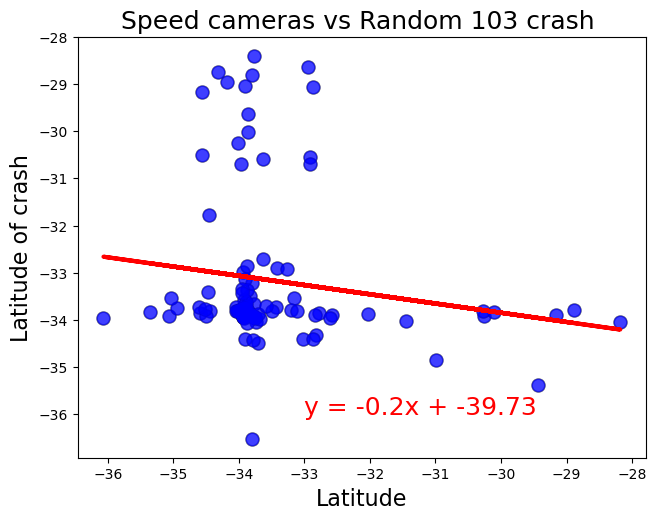

In [6]:
# Compute Linear Regression for Each Relationship
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 80, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r^value is: {round(rvalue**2, 8)}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
# Build scatter plot for latitude Speed Camera vs. latitude Red light Camera
# Plot main data
xPlot = random_clean_data["Latitude"]
yPlot = Speed_camera["Lat"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="b", edgecolors='black', alpha=0.5)
plt.tight_layout()
# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude random 103 crash ", fontsize=16)
plt.ylabel("Latitude of speed cameras", fontsize=16)
plt.title("Speed cameras vs Random 103 crash ", fontsize=18)
linearRegression(xPlot, yPlot, -33, -36, "Latitude of crash")
plt.grid() 
plt.savefig("output_data/Fig1.png",dpi=300, bbox_inches = "tight")
# Save the figure

# Show plot
plt.show()

In [ ]:
# No linear relationship. It is mean, my random crashes were happed not near the speed camera. It is mean the speed camepa help to avoid crash.

In [7]:
# Mpping the Cameras
map_plot_1 = Speed_camera.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width=800, 
    frame_height=500,
    size = 80,
    hover_cols = ["Suburb", "Road"])

# Display the map plot_1
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Suburb,Road)

In [8]:
# Mapping the crashes on a road NSW
map_plot_2 = random_clean_data.hvplot.points(
    "Longitude",
    "Latitude",
    
    geo = True,
    tiles = "OSM",
    frame_width=800, 
    frame_height=500,
    scale = 2,
    size = "RUM - code",
    hover_cols = ["Town"],
    color = "red"
)

# Display the map plot_2
map_plot_2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (RUM - code,Town)